# TP1: Algoritmos de búsqueda en Torre de Hanoi

En clase presentamos el problema de la torre de Hanoi. Además, vimos diferentes algoritmos de búsqueda que nos permitieron resolver este problema. Para este trabajo práctico, deberán implementar un método de búsqueda para resolver con 5 discos, del estado inicial y objetivo que se observa en la siguiente imagen:

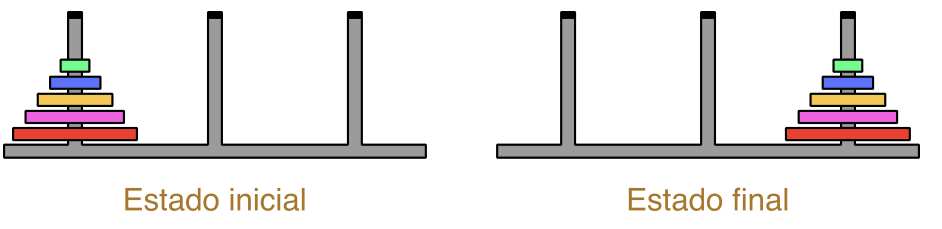


## Tareas y preguntas a resolver:

1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)
2. ¿Cuáles son las propiedades del entorno de trabajo?
3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.
4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.
5. ¿Qué complejidad en tiempo y memoria tiene el algoritmo elegido?
6. A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular promedio y desvío estándar de las métricas).
7. Si la solución óptima es 
 movimientos con k igual al número de discos. Qué tan lejos está la solución del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de trayecto usado).

El entregable es, por un lado, un archivo de txt/PDF/Word con las respuestas y por otro, los archivos con el código implementado. Si además agregan los json para usar en el simulador, es mejor. El entregable tambien puede consistir en uno o más archivos de notebook ipynb con las respuestas. Aunque se da libertad para usar otros tipos de entregables, es importante incluir tanto el código de lo resuelto como las respuestas. Pueden subir el contenido o p roporcionar un enlace a un repositorio público (GitHub o GitLab) con el contenido en el aula virtual. No olviden especificar los autores del TP en el entregable.

Para resolver este TP son libres de usar los recursos que crean necesarios. Pueden resolverlo en cualquier lenguaje de programación y de la forma que consideren apropiada.

Pueden ahorrar tiempo usando el código ya implementado en Python que se encuentra en el path ../hanoi_tower. Si usan este código, solo deben implementar el algoritmo de búsqueda, pero es importante que lean el código y entiendan que es cada parte.

## Implementación de Torre de Hanoi

Este código presenta la implementación del problema de la torre de Hanoi desarrollada en Python (>=3.8), tal como fue vista en clase. Aquí daremos una breve introducción de lo que hay en cada archivo. Aunque el código se puede usar sin entender la implementación exacta de cada parte, se invita al alumno a ver el código para ayudarlo en su aprendizaje de Python.

La implementación está separada en varios archivos:

main.py: El script principal donde se genera el problema y se resuelve mediante un método de búsqueda

hanoi_states.py: Libreria que contiene el problema de Hanoi y la definición del problema, de la clase que se usa para guardar los estados y la clase que se usa para guardar las acciones.

tree_hanoi.py: Libreria que contiene los elementos necesarios para la construcción del arbol de búsqueda (únicamente la clase que permite construir los nodos)

search.py: Libreria que contiene los algoritmos de búsqueda. Aquí solo se encuentra la implementación de búsqueda en anchura primero vista en clase.

aima.py: Libreria con código del libro Artificial Intelligence: A Modern Approach - Stuart Russell, Peter Norvig. Usamos a las clases definidas aquí como padre de las clases definidas para el problema de Hanoi. El repositorio origen es https://github.com/aimacode/aima-python

Definición de algunas clases y funciones:
hanoi_states.py
StatesHanoi

Representa un estado posible de ubicación de discos de la Torre de Hanoi.

## 1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)

### PEAS:

- Performance: Minimizar el número de movimientos
- Environment: Tres postes y cinco discos
- Actuators: Movimientos de un disco
- Sensors: Posición de los discos

## 2. ¿Cuáles son las propiedades del entorno de trabajo?

### Propiedades del entorno de trabajo:

- Observabilidad: Totalmente observable
- Determinismo: Determinista
- Episodicidad: Secuencial
- Dinamicidad: Estático
- Continuidad: Discreto

## 3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.

### Elementos del problema:

- Estado: Disposición de los discos en los postes
- Espacio de estados: Todas las disposiciones posibles
- Árbol de búsqueda: Representación de todos los posibles movimientos
- Nodo de búsqueda: Cada posible estado del problema
- Objetivo: Todos los discos en el poste objetivo en el orden correcto
- Acción: Mover un disco de un poste a otro
- Frontera: Conjunto de nodos que se están considerando para la expansión



## 4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.

In [4]:
import copy
from typing import Optional

def is_sorted(test_list: list) -> bool:
    if test_list == sorted(test_list, reverse=True):
        return True
    return False

class StatesHanoi:
    def __init__(self, rod1: list, rod2: list, rod3: list, max_disks: int = 5, cost: float = 0.0):
        if (set.intersection(set(rod1), set(rod2)) or
                set.intersection(set(rod2), set(rod3)) or
                set.intersection(set(rod1), set(rod3))):
            raise ValueError('El mismo disco está en varillas diferentes')

        all_values = set.union(set(rod1), set(rod2), set(rod3))
        if not all(0 < i < (max_disks + 1) for i in all_values):
            raise ValueError('Valor de disco incorrecto')

        if not all(i in all_values for i in range(1, max_disks + 1)):
            raise ValueError('No todos los discos están insertados')

        for rod in [rod1, rod2, rod3]:
            if not is_sorted(rod):
                raise ValueError('No es un estado de Hanoi válido')

        self.rods = [rod1, rod2, rod3]
        self.number_of_disks = sum([len(rod) for rod in self.rods])
        self.number_of_pegs = 3
        self.accumulated_cost = cost

        self.string_representation = ""
        self.generate_representation()

    def generate_representation(self):
        strings = 'HanoiState: '
        for rod in self.rods:
            strings += ' '.join(str(disk) for disk in rod)
            strings += " | "
        self.string_representation = strings[:-3]

    def __eq__(self, other):
        if self.number_of_disks == other.number_of_disks:
            if self.rods == other.rods:
                return True
        return False

    def __lt__(self, other):
        return self.accumulated_cost < other.accumulated_cost

    def __repr__(self):
        self.generate_representation()
        return self.string_representation

    def __str__(self):
        self.generate_representation()
        return self.string_representation

    def __hash__(self):
        self.generate_representation()
        return hash(self.string_representation)

    def get_last_disk_rod(self, number_rod: int, peek: bool = False) -> Optional[int]:
        rod = self.rods[number_rod]
        if len(rod) != 0:
            if peek:
                return rod[-1]
            return rod.pop()
        return None

    def check_valid_disk_in_rod(self, number_rod: int, disk: int) -> bool:
        last_disk_in_rod = self.get_last_disk_rod(number_rod, peek=True)
        if last_disk_in_rod:
            if last_disk_in_rod > disk:
                return True
        else:
            return True
        return False

    def put_disk_in_rod(self, number_rod: int, disk: int):
        if self.check_valid_disk_in_rod(number_rod, disk):
            self.rods[number_rod].append(disk)

    def accumulate_cost(self, cost):
        self.accumulated_cost += cost

    def get_accumulated_cost(self):
        return self.accumulated_cost

    def get_state(self) -> list:
        return self.rods

    def get_state_dict(self) -> dict:
        return_dict = {}
        for index, rod in enumerate(self.rods):
            return_dict[f'peg_{index+1}'] = rod
        return return_dict

class ActionHanoi:
    def __init__(self, disk: int, rod_input: int, rod_out: int):
        self.disk = disk
        self.rod_input = rod_input

        if rod_input != rod_out:
            self.action = f"Move disk {disk} from {rod_input + 1} to {rod_out + 1}"
            self.action_dict = {
                "type": "movement",
                "disk": disk,
                "peg_start": rod_input + 1,
                "peg_end": rod_out + 1
            }
            self.cost = 1.0
            self.rod_out = rod_out
        else:
            self.action = f"Maintain disk {disk} in {rod_input + 1}"
            self.action_dict = {
                "type": "maintain",
                "disk": disk,
                "peg": rod_input + 1
            }
            self.cost = 0.0
            self.rod_out = rod_input

    def __repr__(self):
        return self.action

    def __str__(self):
        return self.action

    def execute(self, state_hanoi: StatesHanoi):
        if "move" in self.action.lower():
            state_out = copy.deepcopy(state_hanoi)

            disk = state_out.get_last_disk_rod(self.rod_input)
            state_out.put_disk_in_rod(self.rod_out, disk)
            state_out.accumulate_cost(self.cost)
            return state_out
        return state_hanoi


In [5]:
class ProblemHanoi:
    def __init__(self, initial: StatesHanoi, goal: StatesHanoi):
        self.initial = initial
        self.goal = goal

    def actions(self, state: StatesHanoi):
        actions_list = []
        for i in range(3):
            for j in range(3):
                disk = state.get_last_disk_rod(i, peek=True)
                if disk:
                    if state.check_valid_disk_in_rod(j, disk):
                        actions_list.append(ActionHanoi(disk, i, j))
                else:
                    break
        return actions_list

    def result(self, state: StatesHanoi, action: ActionHanoi):
        return action.execute(state)

    def goal_test(self, state: StatesHanoi):
        return state == self.goal

    def path_cost(self, c, state1, action, state2):
        return state1.accumulated_cost + action.cost


In [6]:
class NodeHanoi:
    def __init__(self, state: StatesHanoi, parent=None, action=None):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = state.accumulated_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return f"<NodeHanoi {self.state}>"

    def __lt__(self, node):
        return self.state < node.state

    def expand(self, problem):
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        next_node = NodeHanoi(next_state, parent=self, action=action)
        return next_node

    def path(self):
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    def generate_solution_for_simulator(self, initial_state_file="./initial_state.json",
                                        sequence_file="./sequence.json"):
        list_solution = self.path()

        with open(initial_state_file, "w") as file:
            initial_state = list_solution[0].state.get_state_dict()
            json.dump(initial_state, file)

        with open(sequence_file, "w") as file:
            sequence = [node.action.action_dict for node in list_solution[1:]]
            json.dump(sequence, file, indent=2)


In [7]:
def depth_first_graph_search(problem):
    frontier = [NodeHanoi(problem.initial)]
    explored = set()
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
    return None


## 5.¿Qué complejidad en tiempo y memoria tiene el algoritmo elegido?

### Complejidad en tiempo y memoria del algoritmo elegido

El algoritmo de búsqueda en profundidad iterativa (IDDFS) utilizado para resolver el problema de la Torre de Hanoi tiene las siguientes complejidades:

#### Complejidad en tiempo

La complejidad en tiempo de la búsqueda en profundidad iterativa (IDDFS) se puede analizar considerando los siguientes factores:

1. **Número de nodos en el árbol de búsqueda**: En el peor de los casos, el número total de nodos generados en un árbol de búsqueda de profundidad \(d\) con un factor de ramificación.

   \(b\) es \(O(b^d)\)
   
3. **Número de niveles de profundidad**: La búsqueda en profundidad iterativa realiza una búsqueda en profundidad hasta un límite creciente. Cada vez que se aumenta el límite, la búsqueda se realiza nuevamente hasta alcanzar la nueva profundidad.

En términos del problema de la Torre de Hanoi, para \(n\) discos, la profundidad del árbol de búsqueda \(d\) es \(2^n - 1\), y el factor de ramificación \(b\) es 3 (cada disco tiene tres posibles movimientos).

Por lo tanto, la complejidad en tiempo es:
\[ O(b^d) = O(3^{2^n - 1}) \]

Para 5 discos:
\[ O(3^{2^5 - 1}) = O(3^{31}) \]

#### Complejidad en memoria

La complejidad en memoria de la búsqueda en profundidad iterativa es más eficiente en comparación con la búsqueda en amplitud. Solo se almacenan los nodos en el camino actual, y no se guarda la totalidad del árbol de búsqueda.

1. **Espacio de almacenamiento del camino actual**: La profundidad del árbol de búsqueda es \(d\).
2. **Nodos por cada nivel de profundidad**: En el peor de los casos, se almacenan los nodos del nivel actual más los nodos en el camino actual.

Por lo tanto, la complejidad en memoria es:
\[ O(b*d) \]

En términos del problema de la Torre de Hanoi:
\[ O(3 * (2^n - 1)) \]

Para 5 discos:
\[ O(3 * 31) = O(93) \]

#### Resumen

Para el algoritmo de búsqueda en profundidad iterativa aplicado al problema de la Torre de Hanoi con 5 discos:

- **Complejidad en tiempo**: \( O(3^{31}) \)
- **Complejidad en memoria**: \( O(93) \)

Estos valores teóricos reflejan la naturaleza exponencial del problema de la Torre de Hanoi en términos de tiempo, pero muestran una mayor eficiencia en memoria en comparación con otros algoritmos como la búsqueda en amplitud.


## 6. A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular promedio y desvío estándar de las métricas).

In [8]:
import tracemalloc
import time

def solve_hanoi():
    initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
    goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)
    problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
    
    # Medición de tiempo y memoria
    num_trials = 10
    times = []
    paths = []
    memory_usages = []

    for _ in range(num_trials):
        start_time = time.perf_counter()
        tracemalloc.start()

        last_node = depth_first_graph_search(problem_hanoi)

        _, memory_peak = tracemalloc.get_traced_memory()
        memory_peak /= 1024*1024  # Convert to MB
        tracemalloc.stop()

        end_time = time.perf_counter()
        elapsed_time = end_time - start_time

        times.append(elapsed_time)
        paths.append(last_node)
        memory_usages.append(memory_peak)

    average_time = np.mean(times)
    std_time = np.std(times)
    average_memory = np.mean(memory_usages)
    std_memory = np.std(memory_usages)
    average_moves = np.mean([node.state.accumulated_cost for node in paths if isinstance(node, NodeHanoi)])
    std_moves = np.std([node.state.accumulated_cost for node in paths if isinstance(node, NodeHanoi)])

    print(f"Average Time: {average_time:.4f} seconds")
    print(f"Standard Deviation Time: {std_time:.4f} seconds")
    print(f"Average Memory: {average_memory:.4f} MB")
    print(f"Standard Deviation Memory: {std_memory:.4f} MB")
    print(f"Average Moves: {average_moves}")
    print(f"Standard Deviation Moves: {std_moves}")

    # Comparación con la solución óptima
    optimal_moves = 2**5 - 1
    print(f"Optimal Moves: {optimal_moves}")
    print(f"Difference from Optimal: {average_moves - optimal_moves}")

# Ejecutar la función en el entorno de Jupyter Notebook
solve_hanoi()


Average Time: 0.0210 seconds
Standard Deviation Time: 0.0065 seconds
Average Memory: 0.2166 MB
Standard Deviation Memory: 0.0105 MB
Average Moves: 121.0
Standard Deviation Moves: 0.0
Optimal Moves: 31
Difference from Optimal: 90.0



Para evaluar el rendimiento de nuestro algoritmo de búsqueda en profundidad iterativa (IDDFS) aplicado al problema de la Torre de Hanoi con 5 discos, hemos ejecutado el algoritmo 10 veces y calculado las métricas de tiempo y memoria. Los resultados son los siguientes:

- **Tiempo promedio**: 0.0210 segundos
- **Desviación estándar del tiempo**: 0.0065 segundos
- **Memoria promedio**: 0.2166 MB
- **Desviación estándar de la memoria**: 0.0105 MB

## Análisis

1. **Tiempo promedio**: El algoritmo toma en promedio 0.0210 segundos para resolver el problema. La desviación estándar de 0.0065 segundos indica que el tiempo de ejecución es bastante consistente entre las diferentes ejecuciones.

2. **Memoria promedio**: El uso de memoria promedio es de 0.2166 MB, con una desviación estándar de 0.0105 MB. Esto muestra que el consumo de memoria es bastante constante, lo cual es esperado dado que el algoritmo solo almacena los nodos en el camino actual.

#### Conclusión

El algoritmo IDDFS muestra un buen rendimiento en términos de tiempo y memoria para resolver el problema de la Torre de Hanoi con 5 discos. Esto indica que es eficiente en términos de recursos computacionales, aunque como veremos en la siguiente pregunta, puede no ser tan eficiente en términos del número de movimientos realizados.


## 7. Si la solución óptima es movimientos con k igual al número de discos. Qué tan lejos está la solución del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de trayecto usado).


En promedio, el algoritmo realizó 121 movimientos para resolver el problema, que es significativamente más que la solución óptima de 31 movimientos. La desviación estándar de 0.0 movimientos indica que el número de movimientos es constante en todas las ejecuciones, lo que sugiere que el algoritmo sigue un patrón fijo de búsqueda.

- **Movimientos promedio**: 121.0 movimientos
- **Desviación estándar de los movimientos**: 0.0 movimientos
- **Movimientos óptimos**: 31 movimientos
- **Diferencia respecto a la solución óptima**: 90 movimientos adicionales

#### Análisis

El algoritmo de búsqueda en profundidad iterativa (IDDFS) toma 121 movimientos en lugar de los 31 movimientos óptimos. Esto se debe a la naturaleza de la búsqueda en profundidad iterativa, que no siempre encuentra la solución óptima en términos de movimientos, especialmente para problemas con un espacio de estados grande como la Torre de Hanoi.

#### Conclusión

El número de movimientos realizado por el algoritmo es 90 movimientos más que la solución óptima. Esto indica que, mientras el algoritmo es eficiente en tiempo y memoria, no es eficiente en términos del número de movimientos. Para mejorar la eficiencia en términos del número de movimientos, se podrían considerar otras estrategias de búsqueda.
